# Decision Tree Classification

##### Import the dataset

In [3]:
import pandas as pd

dataset = pd.read_csv(r"D:\Sushmitha\Susuhmi\Iris_new.csv")

### Exploratory Data Analysis (EDA)

In [5]:
print(dataset.head())

   sepal_length  sepal_width  petal_length  petal_width spectype
0           5.1          3.5           1.4          0.2   setosa
1           4.9          3.0           1.4          0.2   setosa
2           4.7          3.2           1.3          0.2   setosa
3           4.6          3.1           1.5          0.2   setosa
4           5.0          3.6           1.4          0.2   setosa


In [6]:
print(dataset.shape)

(150, 5)


In [7]:
print(dataset.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'spectype'],
      dtype='object')


In [8]:
print(dataset.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   spectype      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [9]:
print(dataset.isnull().sum()) 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
spectype        0
dtype: int64


In [10]:
print(dataset.describe()) 

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### Data Visualization

In [11]:
import matplotlib.pyplot as plt

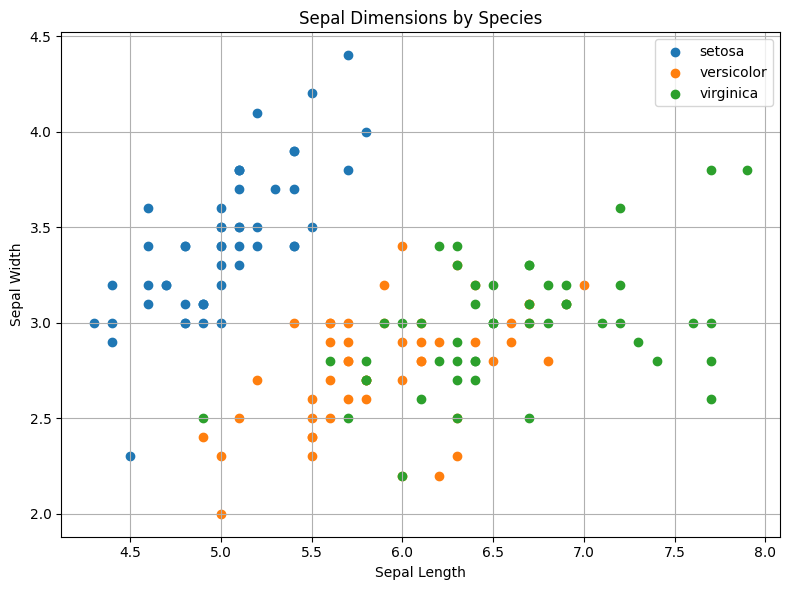

In [12]:
plt.figure(figsize=(8, 6))
for species in dataset['spectype'].unique():
    subset = dataset[dataset['spectype'] == species]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=species)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Dimensions by Species')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

###### Comparing Sepal Length Across Species

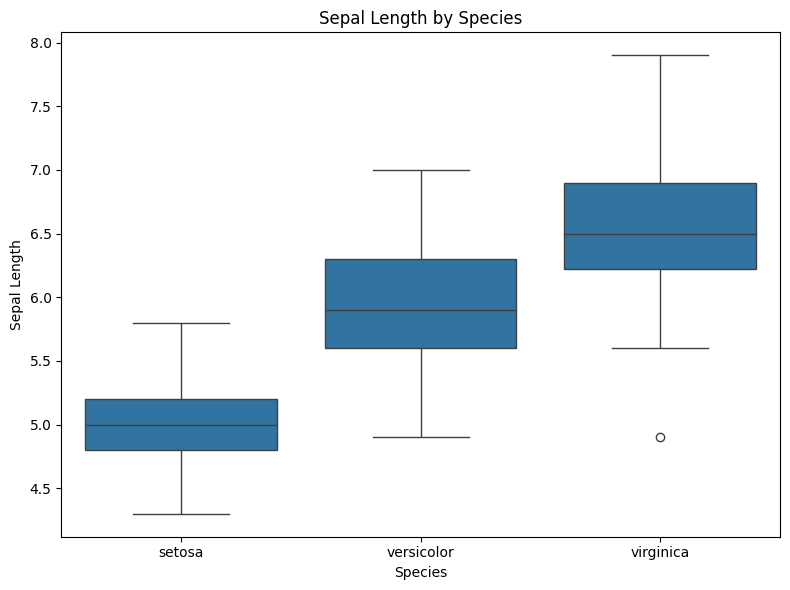

In [13]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='spectype', y='sepal_length', data=dataset)
plt.title('Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.tight_layout()
plt.show()

### Model Building

#### Selecting Feature and Target

In [14]:
X =dataset.drop(columns=['spectype'])  
y = dataset['spectype'] 

In [15]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: spectype, dtype: object

### Split the dataset into training and testing sets

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [18]:
dataset.shape

(150, 5)

In [19]:
X_train.shape

(120, 4)

In [20]:
X_test.shape

(30, 4)

### Encoding the dependent variable

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [22]:
print("Encoded y_train:\n", y_train_encoded[:5])
print("\nEncoded y_test:\n", y_test_encoded[:5])

Encoded y_train:
 [2 1 0 2 2]

Encoded y_test:
 [2 1 0 2 0]


### Feature Scaling (Scaling the feature columns)

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [24]:
'''
Since X_train is transformed using StandardScaler(), it is converted into a NumPy array, 
which does not have a .head() method like a Pandas DataFrame.
'''

print("Scaled X_train:\n", X_train_scaled[:5])
print("\nScaled X_test:\n", X_test_scaled[:5])

Scaled X_train:
 [[ 0.61303014  0.10850105  0.94751783  0.73603967]
 [-0.56776627 -0.12400121  0.38491447  0.34808318]
 [-0.80392556  1.03851009 -1.30289562 -1.3330616 ]
 [ 0.25879121 -0.12400121  0.60995581  0.73603967]
 [ 0.61303014 -0.58900572  1.00377816  1.25331499]]

Scaled X_test:
 [[-0.09544771 -0.58900572  0.72247648  1.51195265]
 [ 0.14071157 -1.98401928  0.10361279 -0.29851096]
 [-0.44968663  2.66602591 -1.35915595 -1.3330616 ]
 [ 1.6757469  -0.35650346  1.39760052  0.73603967]
 [-1.04008484  0.80600783 -1.30289562 -1.3330616 ]]


### Training the Decision Tree Classification model on the Training set

In [25]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model.fit(X_train_scaled, y_train_encoded)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Make Predictions with Test Data

In [26]:
y_pred = model.predict(X_test_scaled)

print("Actual Output:\n", y_test_encoded[:5])
print("\nPredicted Output:\n", y_pred[:5])

Actual Output:
 [2 1 0 2 0]

Predicted Output:
 [2 1 0 2 0]


#### Evaluating the Model

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test_encoded,y_pred)
accuracy_score = accuracy_score(y_test_encoded,y_pred)

print("\nModel Evaluation:")
print(f"Accuracy Score: {accuracy_score:.2f}")
print(f"\nConfusion Matrix: \n{cm}")


Model Evaluation:
Accuracy Score: 1.00

Confusion Matrix: 
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


## Making prediction for new data

In [28]:
new_data = pd.DataFrame({
    'sepal_length': [5.8, 2.8],               
    'sepal_width': [3.2, 3.9], 
    'petal_length': [1.9, 4.6],
    'petal_width': [0.8, 1.3]
})

new_data

,sepal_length,sepal_width,petal_length,petal_width
0,5.8,3.2,1.9,0.8
1,2.8,3.9,4.6,1.3


### Ensuring New Data Matches Training Data Structure

In [29]:
new_data_scaled = sc.transform(new_data)
new_data_scaled

array([[-0.09544771,  0.34100331, -1.07785427, -0.55714862],
       [-3.63783694,  1.96851913,  0.4411748 ,  0.08944552]])

### Make predictions